# Analysis and prediction of cardiovascular disease


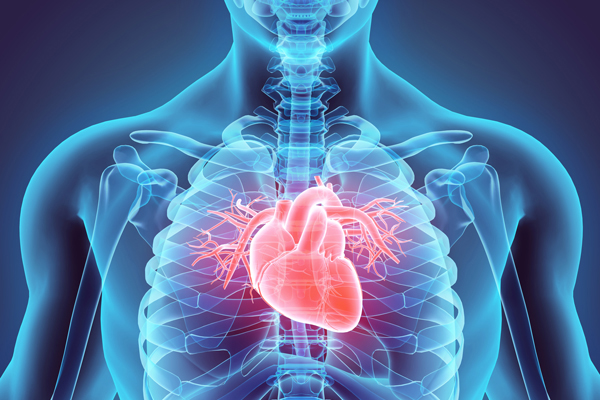


# Content

- [Introduction](#1-introduction)

  - [What are cardiovascular diseases?](#11-what-are-cardiovascular-diseases)

  - [About the dataset](#12-about-the-dataset)

  - [Library import](#13-import-libraries)

  - [Load data set](#14-load-dataset)

  - [Data preparation and cleaning](#15-data-preparation-and-cleaning)

    - [Dataset dimensions](#151-dataset-dimensions)

    - [Dataset preview](#152-data-preview)

    - [Data Description](#153-data-description)

    - [Renaming columns](#154-renaming-columns)

    - [Checking for a missing values](#155-checking-for-missing-values)

- [Attribute analysis](#2-attribute-analysis)

  - [Objective of the analysis](#21-analysis-objective)
  - [Distribution of cases according to heart diseases](#22-distribution-of-cases-by-heart-disease)
  - [Correlations between attributes](#23-correlations-between-attributes)
  - [Visualization of important attributes and their relationship with the target attribute](#24-visualization-of-important-attributes-and-their-relationships-with-the-target-attribute)
    - [Sex](#241-sex)
    - [Age](#242-age)
    - [Distribution by gender and age based on target](#243-distribution-by-gender-and-age-based-on-the-target-attribute)
    - [Chest pain type](#244--chest-pain-type)
    - [Major vessel distribution](#244-distribution-of-major-blood-vessels-in-positive-cases-major-vessel-distribution)
    - [ST segment slope at peak load](#245-slope-of-the-st-segment-at-peak-exercise)
  - [Risk factors for developing heart disease](#25-risk-factors-for-the-development-of-heart-disease)
    - [1. Risk factor: Fasting_bs](#1-risk-factor-fasting-blood-sugar-above-120-mgdl)
    - [2. Risk factor: Resting_bp](#2-risk-factor-resting-blood-pressure-mmhg)
    - [3. Risk factor: high cholesterol](#3-risk-factor-high-cholesterol)
    - [4. Risk factor:. Maximum heart rate (bpm)](#4-risk-factor-maximum-heart-rate-bpm)

- [Machine learning model](#3-machine-learning-model)
  - [Standardization of numerical data](#31-standardization-of-numeric-data)
  - [K-Nearest neighbors](#32-k-nearest-neighbors-knn)
    - [Splitting the data into training and test sets](#321-the-division-of-data-into-training-and-test-sets)
    - [Incorporating k-nearest neighbor classification algorithms and model learning](#322-inclusion-of-the-k-nearest-neighbors-classification-algorithm-and-model-training)
    - [Prediction of results](#323-prediction-of-the-results)
    - [Confusion Matrix](#324-confusion-matrix)
    - [Testing the stratified k-fold algorithm](#325-algorithm-exploration-with-stratified-k-fold-cross-validation)
    - [Parameter optimization by random search](#326-parameter-optimization-with-random-search)
  - [Testing multiple classification models](#33-explore-multiple-classification-models)
- [Important findings and contribution of the project](#4-important-findings-and-contributions-of-the-project)


# <div style="color:white;background-color:#e90045;padding:2%;border-radius:10px 10px;font-size:1em;text-align:center">1. Introduction</div>


## 1.1 What are cardiovascular diseases?

<p> Heart disease (or cardiovascular disease) is a general term that describes a range of conditions that affect the heart or blood vessels. It is currently the most common cause of death worldwide, with 17.9 million people dying from it every year, accounting for 31% of all global deaths. Heart diseases include:
<ul>
<li> Diseases of blood vessels, such as coronary artery disease </li>
<li> Heart rhythm problems (arrhythmias) </li>
<li> Congenital heart defects, which you are born with (congenital heart defects) </li>
<li> Heart valve diseases </li>
<li> Heart muscle disease </li>
<li> Heart infection </li>
</ul>
Many forms of heart disease can be prevented or treated by choosing a healthy lifestyle. A lot of research has been conducted in this field, and many are ongoing. Like many others, research is now more focused on data analysis and machine learning models.

The questions are, what causes heart disease, and how can we prevent it? In this project, I will analyze a dataset to identify the causes and significant features that significantly affect the chances of heart disease. Along with the analysis, this project will involve a predictive classification model that uses machine learning algorithms to predict whether a person has heart disease or not.

</p>


## 1.2 About the Dataset

<p> In this project, I will be using a dataset from the Kaggle website called the Heart Disease Dataset, which dates back to 1988. It consists of 13 attributes, including the target attribute. The "Condition" attribute pertains to whether a patient has heart disease, with a value of 0 indicating the absence of the disease and 1 indicating the presence of the disease. I will attempt to explore this dataset to gain insights into heart diseases, including visualizing the attributes and risk factors that lead to this condition.</p>


## 1.3 Import Libraries


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 1.4 Load Dataset


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TZ/tz projekt na angliski/heart.csv', sep=',')

## 1.5 Data Preparation and Cleaning


### 1.5.1 Dataset Dimensions


In [6]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  1025
Number of columns:  14


### 1.5.2 Data Preview


In [7]:
# preview of the first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### 1.5.3 Data description


In this dataset, there are 13 attributes (columns), including the target attribute. The dataset includes the following columns:

- **<font color="Black">age</font>**: Age in years.
- **<font color="Black">sex</font>**:
  - 0 = Female
  - 1 = Male
- **<font color="Black">cp</font>**: Chest pain type.
  - 0 = Typical angina
  - 1 = Atypical angina
  - 2 = Non-anginal pain
  - 3 = Asymptomatic
- **<font color="Black">trestbps</font>**: Resting blood pressure in mmHg (High blood pressure is defined as 140 mmHg or higher).
- **<font color="Black">chol</font>**: Serum cholesterol in mg/dL (e.g., low-density lipoprotein (LDL), high-density lipoprotein (HDL), and triglycerides, values over 200 mg/dL are concerning).
- **<font color="Black">fbs</font>**: Fasting blood sugar (Blood sugar level over 126 mg/dL indicates diabetes).
  - 0 = False
  - 1 = True
- **<font color="Black">restecg</font>**: Resting electrocardiographic results.
  - 0 = Normal
  - 1 = Abnormal ST-T wave
  - 2 = Showing probable or definite left ventricular hypertrophy
- **<font color="Black">thalach</font>**: Maximum heart rate achieved (in beats per minute).
- **<font color="Black">exang</font>**: Exercise-induced angina.
  - 0 = No
  - 1 = Yes
- **<font color="Black">oldpeak</font>**: ST depression induced by exercise relative to rest.
- **<font color="Black">slope</font>**: Slope of the ST segment at peak exercise.
  - 0 = Upsloping
  - 1 = Flat
  - 2 = Downsloping
- **<font color="Black">ca</font>**: Number of major vessels (0-3) colored by fluoroscopy; if the vessel is not colored, there is a clot.
- **<font color="Black">thal</font>**: Thallium scintigraphy.
  - 3 = Normal
  - 6 = Fixed defect
  - 7 = Reversible defect
- **<font color="Black">target</font>**: Heart disease.
  - 0 = Absent
  - 1 = Present


### 1.5.4 Renaming Columns

Some column names may be somewhat challenging to determine the type of data they represent. Therefore, we will first rename these columns to make them more understandable.


In [8]:
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

### 1.5.5 Checking for Missing Values

#### Checking Summary Statistics of Numeric Columns


In [9]:
df.describe()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Checking Data Types and Missing Values


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1025 non-null   int64  
 1   Sex                      1025 non-null   int64  
 2   Chest_pain_type          1025 non-null   int64  
 3   Resting_bp               1025 non-null   int64  
 4   Cholesterol              1025 non-null   int64  
 5   Fasting_bs               1025 non-null   int64  
 6   Resting_ecg              1025 non-null   int64  
 7   Max_heart_rate           1025 non-null   int64  
 8   Exercise_induced_angina  1025 non-null   int64  
 9   ST_depression            1025 non-null   float64
 10  ST_slope                 1025 non-null   int64  
 11  Num_major_vessels        1025 non-null   int64  
 12  Thallium_test            1025 non-null   int64  
 13  Condition                1025 non-null   int64  
dtypes: float64(1), int64(13)

In [11]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

As we can see from the above results, this dataset does not have any missing values. Because of this, I will skip the data cleaning process in this project.


# <div style="color:white;background-color:#e90045;padding:2%;border-radius:10px 10px;font-size:1em;text-align:center">2. Attribute Analysis </div>


## 2.1 Analysis Objective

The main objective of this analysis is to gain a clearer understanding of which types of attributes can be more significant signals of impending heart disease. I will also attempt to determine which attributes act as risk factors for the development of heart disease, how they are related to the target attribute, and their correlation with other attributes.


## 2.2 Distribution of Cases by Heart Disease

The "Condition" column is the target variable for predicting heart disease. As explained in the attribute description, a value of 0 indicates that a person has heart disease, and 1 indicates that the person does not have heart disease.

The table below shows the count and proportion of individual values in the "Condition" column:

[Please provide the table or specific content you'd like to include in this section, and I'll assist you further.]


[Text(0.5, 1.0, 'Distribution of Diagnosed Cases')]

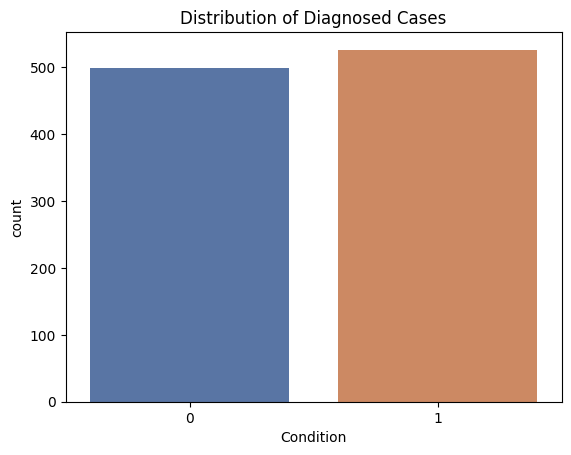

In [12]:
sns.countplot(x='Condition',data=df,palette='deep').set(title='Distribution of Diagnosed Cases')

The difference is very small, which means we are dealing with a balanced dataset. Most of the cases are diagnosed with heart disease, while those diagnosed as healthy are slightly fewer in number.


## 2.3 Correlations Between Attributes


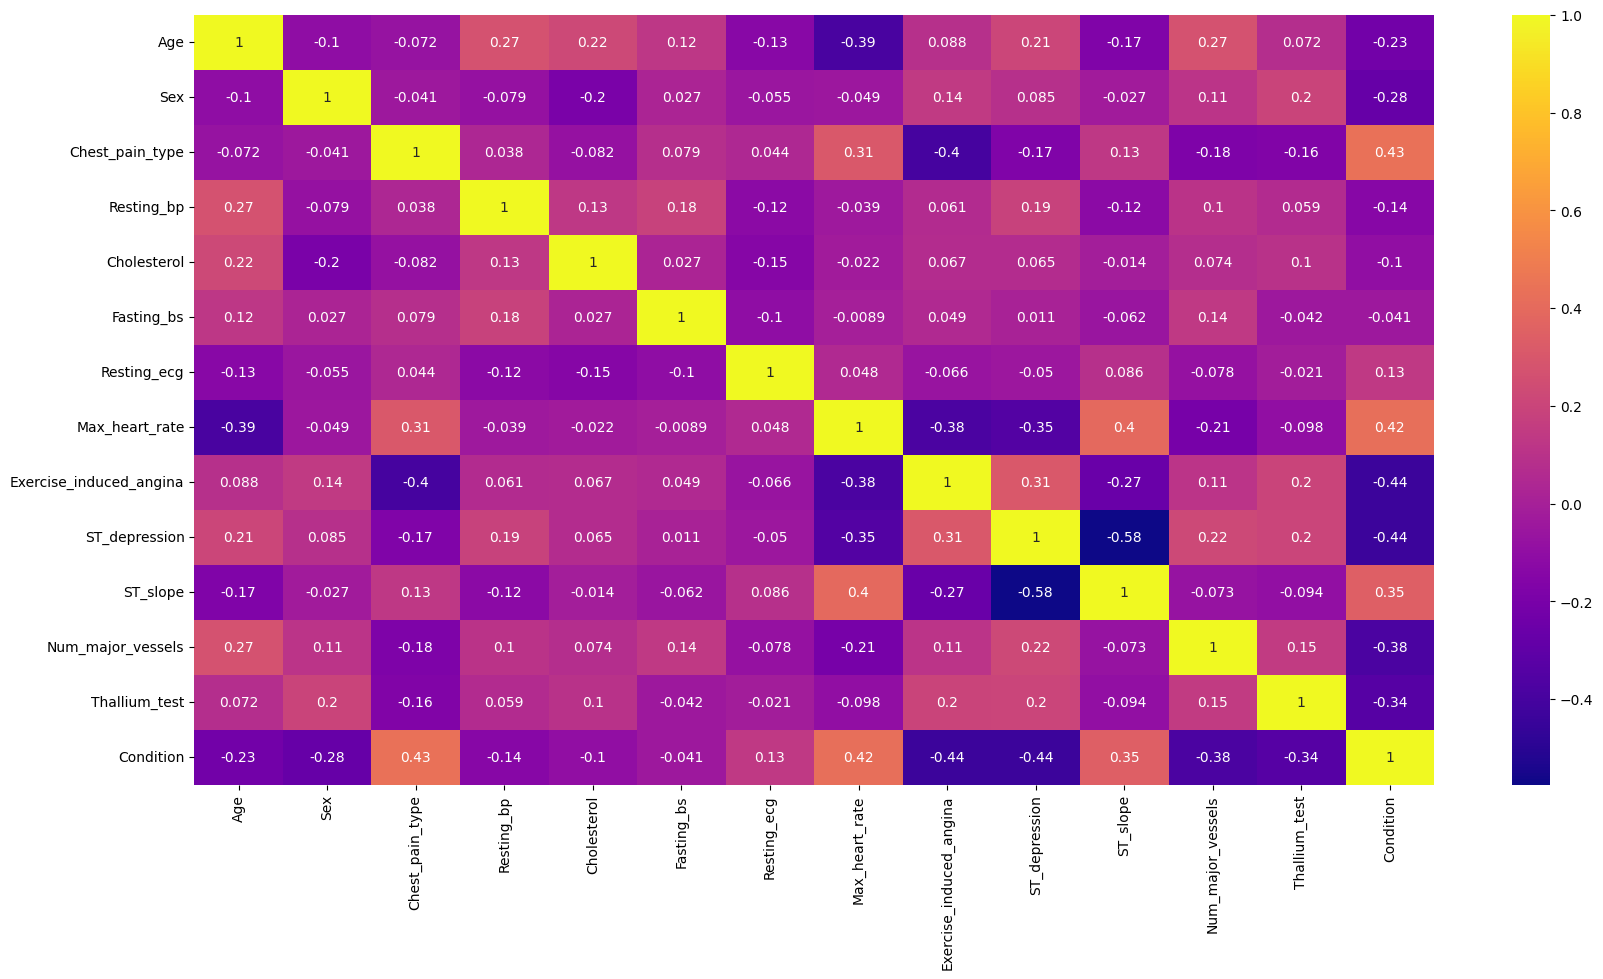

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

There is a positive correlation between the target attribute and chest pain type, thalach, and slope. Additionally, there is a negative correlation between the target attribute and gender, exercise-induced angina, thalach, and oldpeak.


## 2.4 Visualization of Important Attributes and Their Relationships with the Target Attribute


### 2.4.1 Sex


In [14]:
df['Sex'].value_counts()

1    713
0    312
Name: Sex, dtype: int64

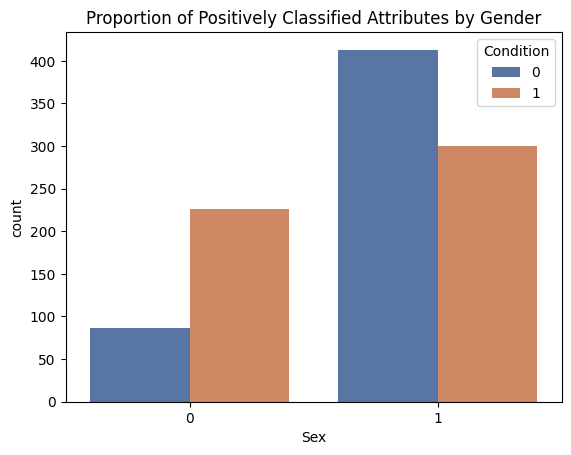

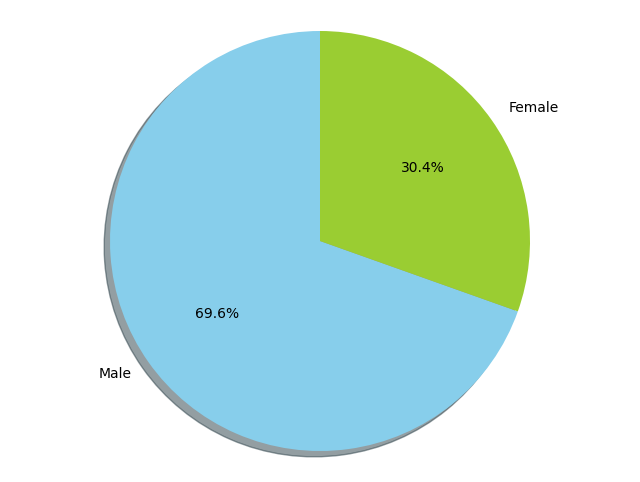

In [15]:
sns.countplot(x='Sex', hue='Condition',data=df,  palette='deep').set(title='Proportion of Positively Classified Attributes by Gender')

male =len(df[df['Sex'] == 1])
female = len(df[df['Sex']== 0])

plt.figure(figsize=(8,6))

labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

### 2.4.2 Age

To visualize the health status of individuals with heart disease, I created a new dataset that contains only positive cases or instances with heart disease.


In [16]:
include=df[df['Condition'].values==1]
exclude=df[df['Condition'].values!=1]
include_1 = include

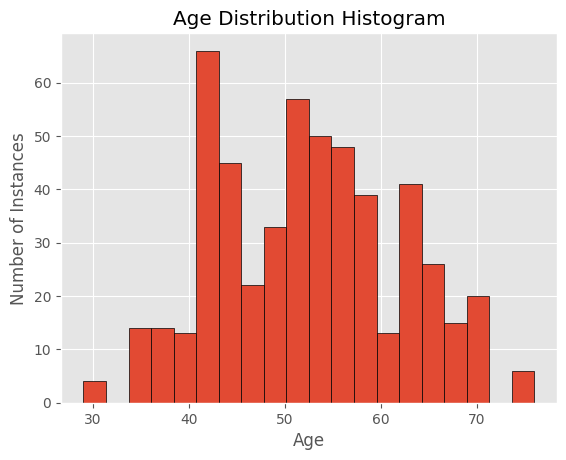

In [17]:
plt.style.use('ggplot')
plt.xlabel("Age")
plt.ylabel("Number of Instances")
plt.title("Age Distribution Histogram")
plt.hist(include_1['Age'], bins=20, edgecolor='black')
plt.show()

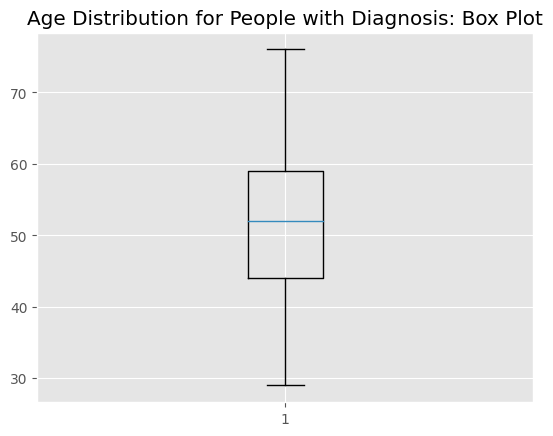

In [18]:
plt.boxplot(include_1['Age'])
plt.title("Age Distribution for People with Diagnosis: Box Plot")
plt.show()

If we analyze the health status by observing certain variables in the dataframe, we can see that the highest age is 76, the lowest is 29, and the average age is 52.


In [19]:
age_max = include_1.Age.max()
age_min = include_1.Age.min()
age_avg = include_1.Age.median()
print("Highest Age: ", age_max)
print("Lowest Age: ", age_min)
print("Average Age: ", age_avg)

Highest Age:  76
Lowest Age:  29
Average Age:  52.0


### 2.4.3 Distribution by Gender and Age Based on the Target Attribute


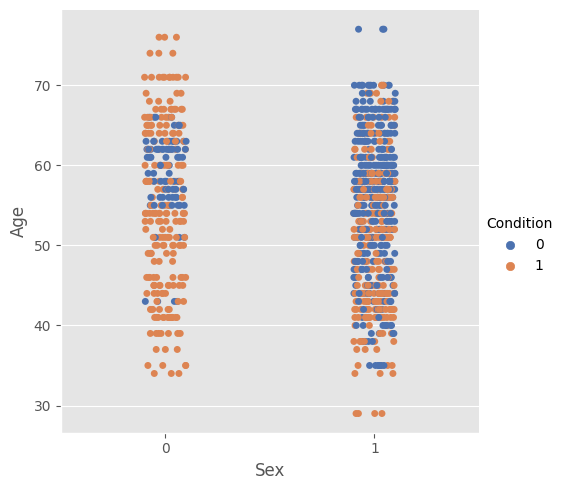

In [20]:
sns.catplot(data=df, x='Sex', y='Age', hue='Condition', palette='deep')

### 2.4.4 : Chest Pain Type


In [21]:
chest_pain = pd.crosstab(df['Chest_pain_type'], df['Condition'])
chest_pain

Condition,0,1
Chest_pain_type,,
0,375,122
1,33,134
2,65,219
3,26,51


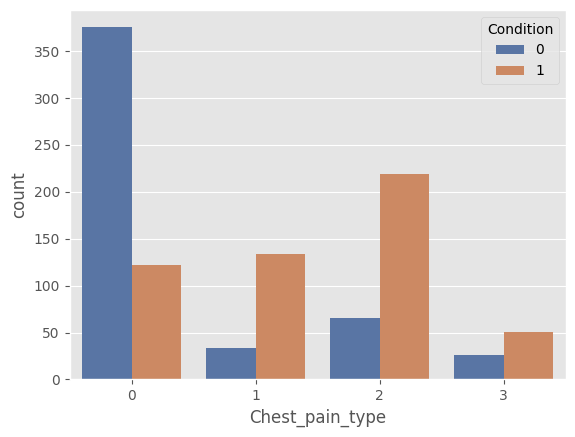

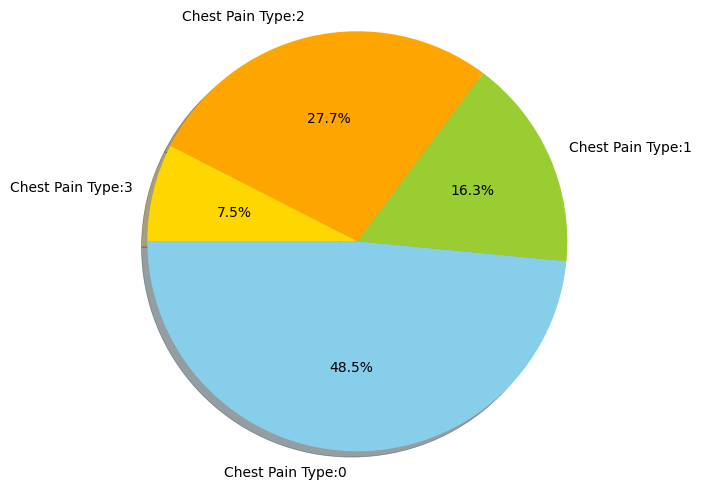

In [22]:
sns.countplot(x='Chest_pain_type', hue='Condition', data=df, palette='deep')

plt.figure(figsize=(8,6))
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['Chest_pain_type'] == 0]),len(df[df['Chest_pain_type'] == 1]),
         len(df[df['Chest_pain_type'] == 2]),
         len(df[df['Chest_pain_type'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.show()

### 2.4.4 Distribution of Major Blood Vessels in Positive Cases (Major Vessel Distribution)


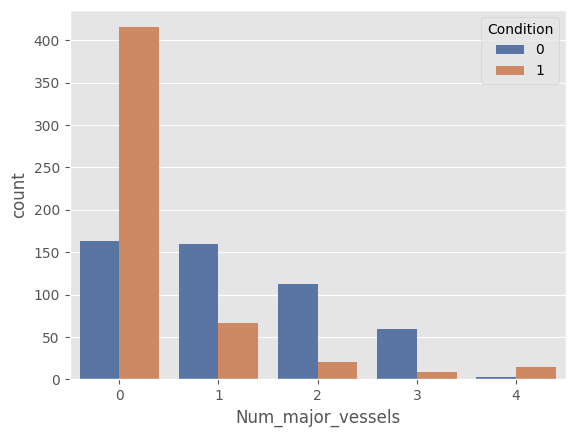

In [23]:
sns.countplot(x='Num_major_vessels', hue='Condition', data=df, palette='deep')
plt.show()

Based on the results, we can conclude that the majority of positive cases do not have significant major blood vessels.


### 2.4.5 Slope of the ST Segment at Peak Exercise


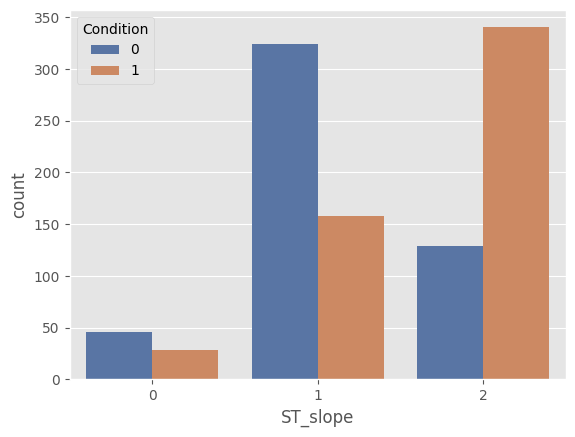

In [24]:
sns.countplot(x='ST_slope', hue='Condition', data=df, palette='deep')
plt.show()

The majority of positive cases have a "downsloping" and "flat" slope of the ST segment at peak exercise.


## 2.5 Risk Factors for the Development of Heart Disease

Numerous studies suggest that the most significant risk factors for the development of heart disease are diabetes, resting blood pressure, and maximum heart rate.


### 1. Risk Factor: Fasting Blood Sugar (above 120 mg/dL)

The attribute "Fasting_bs" tells us whether the instances have elevated fasting blood sugar or not. Normal blood sugar levels are less than 100 mg/dL after at least an 8-hour fast. During fasting, the liver helps maintain a constant blood sugar level by converting fat and muscle into sugar. A fasting blood sugar level above 120 mg/dL is considered prediabetes or diabetes. Elevated blood glucose levels can damage blood vessels due to the effects of high blood sugar, potentially leading to heart disease.


Text(0.5, 0, 'Fasting_bs (0 = False, 1 = True)')

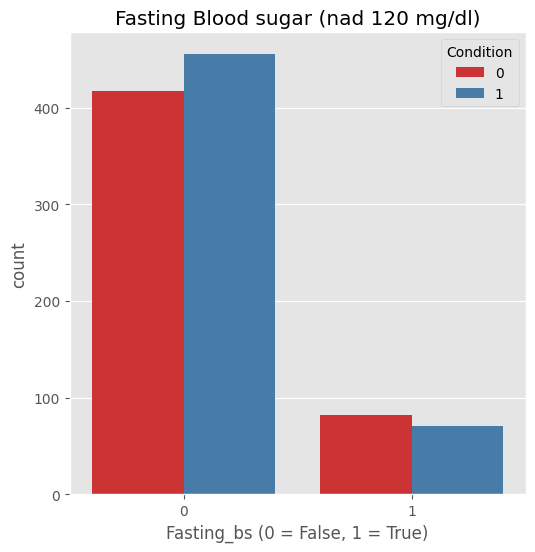

In [25]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Fasting_bs', hue='Condition', data=df, palette='Set1')
plt.title('Fasting Blood sugar (nad 120 mg/dl)')
plt.xlabel('Fasting_bs (0 = False, 1 = True)')

From the graph, we can conclude that people with normal blood sugar levels have a higher prevalence of heart disease compared to those with elevated blood sugar levels.


### 2. Risk Factor: Resting Blood Pressure (mmHg)

The normal range for blood pressure is lower than 120 mmHg. However, if the blood pressure level is above 130 mmHg, it is categorized as hypertension. We can observe a low positive correlation between "Resting_bp" (resting blood pressure) and the target attribute; as resting blood pressure increases, the risk of a heart attack also increases. The highest number of positive cases falls within the resting blood pressure range of 120 to 140.


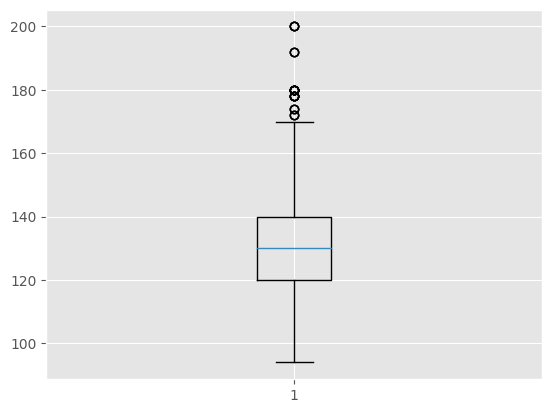

In [26]:
plt.boxplot(df['Resting_bp'])
plt.show()

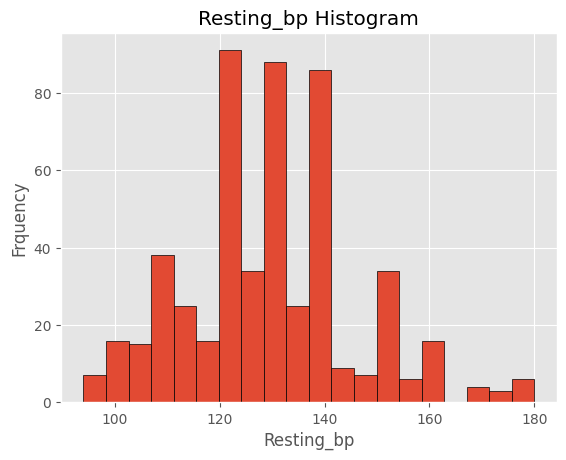

In [27]:
plt.style.use('ggplot')
plt.xlabel("Resting_bp")
plt.ylabel("Frquency")
plt.title("Resting_bp Histogram")
plt.hist(include_1['Resting_bp'], bins = 20, edgecolor = 'black')
plt.show()

Review of the relationship between age and resting blood pressure for each gender:


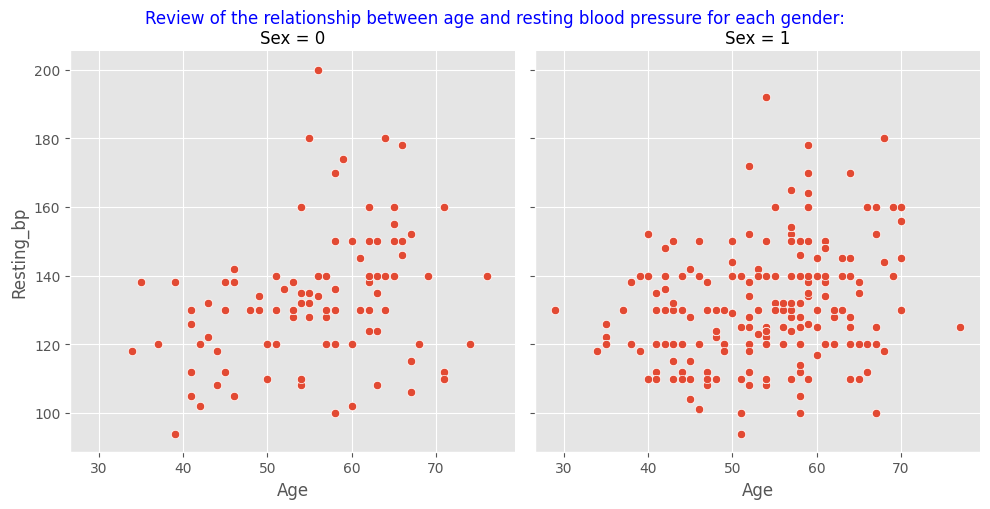

In [28]:
g =sns.relplot(data = df , x ="Age" , y ="Resting_bp" , col ="Sex" )
g.fig.suptitle("Review of the relationship between age and resting blood pressure for each gender:" , y=1.01 , color ="blue" )
plt.show()

From the above graph, we can see that gender does not have a significant impact on the resting blood pressure results.


### 3. Risk Factor: High Cholesterol

Cholesterol is a type of fat that moves through the bloodstream. Serum cholesterol consists of low-density lipoproteins (LDL, "harmful" cholesterol), high-density lipoproteins (HDL, "beneficial" cholesterol), and triglycerides. For women and men aged 20 and older, the normal range of serum cholesterol is 125-200 mg/dL.

Findings indicate that males have lower cholesterol levels compared to females, and the highest cholesterol values fall within the range of 200 to 250.


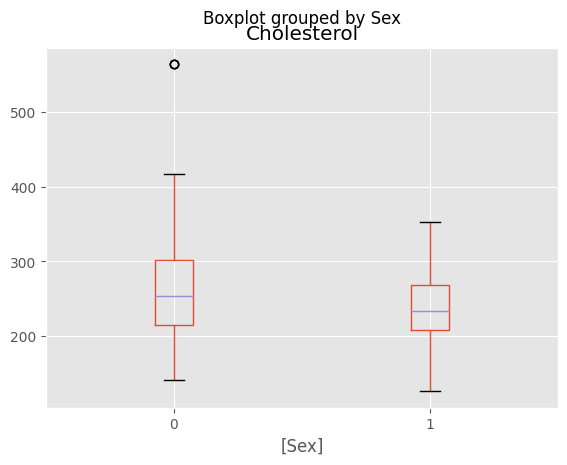

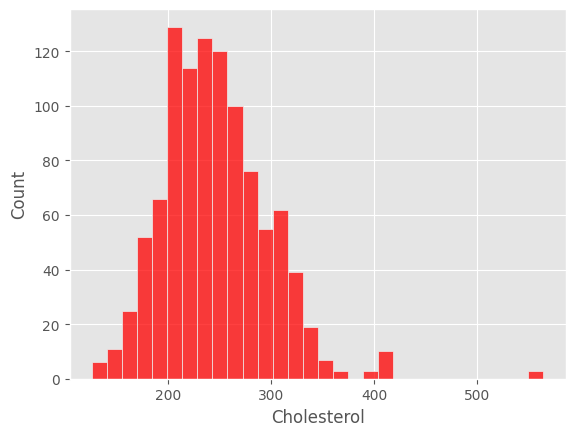

In [29]:
df.boxplot(column='Cholesterol', by=['Sex'])
plt.show()

sns.histplot(df['Cholesterol'],kde=False,bins=30,color='red')
plt.show()

In [30]:
df["Cholesterol"].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: Cholesterol, dtype: float64

### 4. Risk Factor: Maximum Heart Rate (bpm)

For most adults, the normal heart rate falls between 60 and 100 beats per minute (bpm), but it can vary with age. As the heart rate increases, the likelihood of heart disease also increases. The majority of positive cases have a heart rate between 140 and 160 bpm.


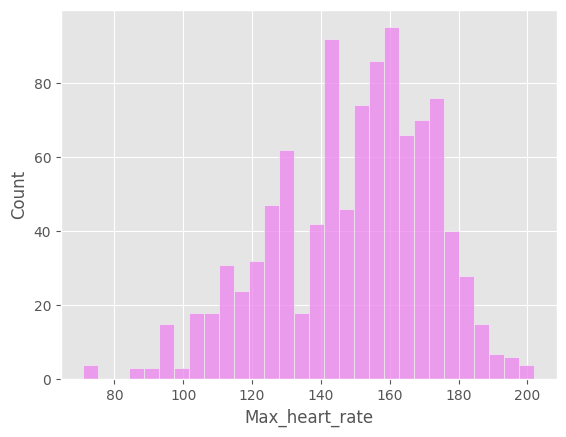

In [31]:
sns.histplot(df['Max_heart_rate'],kde=False,bins=30,color='violet')
plt.show()

# <div style="color:white;background-color:#e90045;padding:2%;border-radius:10px 10px;font-size:1em;text-align:center">3. Machine Learning Model </div>


In this section, I will create a predictive model to attempt to predict the target attribute "Condition." I will use machine learning classification methods, starting with the k-nearest neighbors classifier, and then explore a range of other classification models. I will compare the results obtained and evaluate them using metrics.


## 3.1. Standardization of Numeric Data

In this dataset, all columns are of numeric data types. Therefore, we will use the technique of standardizing numeric data.


In [32]:
import warnings;
warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler

scaled=['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test']

df[scaled] = StandardScaler().fit_transform(df[scaled])

df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0


## 3.2 K-Nearest Neighbors (KNN)


### 3.2.1 The division of data into training and test sets.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

izhod = 'Condition'

df_izhod = df[izhod]
df_vhod = df.drop(izhod, axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_vhod, df_izhod, test_size=0.33, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(686, 13) (339, 13) (686,) (339,)


### 3.2.2 Inclusion of the k-Nearest Neighbors Classification Algorithm and Model Training


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)


KNeighborsClassifier()

### 3.2.3 Prediction of the results


In [35]:
rezultat_knn = knn.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rezultat_knn))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       171
           1       0.87      0.83      0.85       168

    accuracy                           0.86       339
   macro avg       0.86      0.86      0.86       339
weighted avg       0.86      0.86      0.86       339



In [37]:
print('Precision:', metrics.precision_score(rezultat_knn, y_test, average=None)) 
print('Recall:', metrics.recall_score(rezultat_knn, y_test, average=None)) 
print('F1-score:', metrics.f1_score(rezultat_knn, y_test, average=None)) 


Precision: [0.87719298 0.83333333]
Recall: [0.84269663 0.86956522]
F1-score: [0.85959885 0.85106383]


In [38]:
print('Precision:', metrics.precision_score(rezultat_knn, y_test, average='micro')) 
print('Recall:', metrics.recall_score(rezultat_knn, y_test, average='micro')) 
print('F1-score:', metrics.f1_score(rezultat_knn, y_test, average='micro')) 

Precision: 0.855457227138643
Recall: 0.855457227138643
F1-score: 0.855457227138643


### 3.2.4 Confusion Matrix


In [39]:
cnf_matrix = metrics.confusion_matrix(y_test,rezultat_knn)
cnf_matrix

array([[150,  21],
       [ 28, 140]])

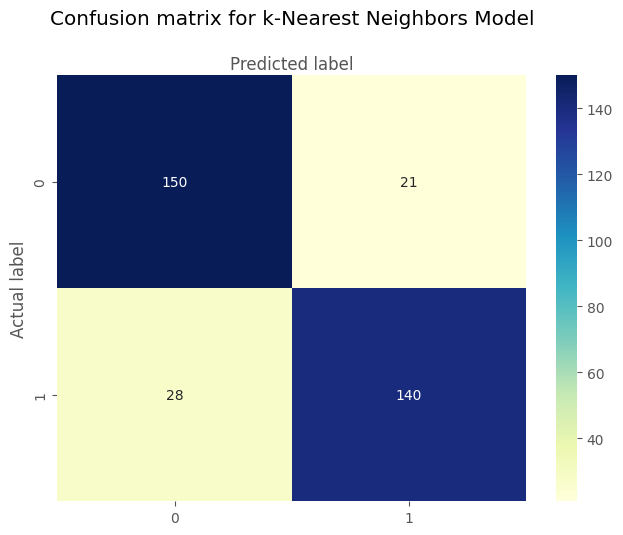

In [40]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### 3.2.5 Algorithm Exploration with Stratified k-Fold Cross-Validation


In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=8, random_state=123, shuffle=True)
cv_rezultati = cross_val_score(KNeighborsClassifier(),
                               df_vhod,
                               df_izhod,
                               cv=kfold,
                               scoring='accuracy')

print(cv_rezultati.mean())

0.8585271317829457


### 3.2.6 Parameter Optimization with Random Search


In [43]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

parametri = {'n_neighbors': sp_randint(1, 20),
             'algorithm': ['ball_tree', 'kd_tree']}

clf = RandomizedSearchCV(KNeighborsClassifier(),
                         param_distributions=parametri,
                         cv=10,
                         n_iter=50,
                         scoring='accuracy')

clf.fit(df_vhod, df_izhod)
print('Best parameter values are:', clf.best_params_)
print('Best score is:', clf.best_score_)
print('Best use in the code is:', clf.best_estimator_)

Best parameter values are: {'algorithm': 'kd_tree', 'n_neighbors': 1}
Best score is: 0.9941462021701885
Best use in the code is: KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1)


## 3.3 Explore multiple classification models.


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

klasifikatorji = []
klasifikatorji.append(DecisionTreeClassifier())
klasifikatorji.append(LogisticRegression(max_iter=3000))
klasifikatorji.append(LinearSVC())
klasifikatorji.append(KNeighborsClassifier())
klasifikatorji.append(GaussianNB())
klasifikatorji.append(RandomForestClassifier())
klasifikatorji.append(ExtraTreesClassifier())
klasifikatorji.append(AdaBoostClassifier())
klasifikatorji.append(GradientBoostingClassifier())

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


arr = []
for klasifikator in klasifikatorji:
    kfold = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
    cv_rezultati = cross_val_score(klasifikator,
                                   df_vhod,
                                   df_izhod,
                                   cv=kfold,
                                   scoring='accuracy')
    arr.append(cv_rezultati.mean())
    print(f'{type(klasifikator).__name__ : >100}: {cv_rezultati.mean():1.9f}')

                                                                              DecisionTreeClassifier: 1.000000000
                                                                                  LogisticRegression: 0.840043785
                                                                                           LinearSVC: 0.840024748
                                                                                KNeighborsClassifier: 0.871206929
                                                                                          GaussianNB: 0.824395583
                                                                              RandomForestClassifier: 1.000000000
                                                                                ExtraTreesClassifier: 1.000000000
                                                                                  AdaBoostClassifier: 0.901484866
                                                                          GradientBoosti

# <div style="color:white;background-color:#e90045;padding:2%;border-radius:10px 10px;font-size:1em;text-align:center">4. Important findings and contributions of the project

 </div>


Through the analysis conducted in this project, I have arrived at the following results:

- The dataset is mostly balanced with the number of positive cases diagnosed with heart disease.
- The variables with the most influence on heart disease include age, gender (indicating that men are more likely to be diagnosed with the disease), maximum heart rate achieved, and resting blood pressure.
- Major vessels: We know that vessel diameters are crucial for cardiovascular diseases. Here, most people diagnosed do not have major vessels, which is a significant indicator.
- Blood sugar: Most positive cases did not have elevated blood sugar.

For a robust and accurate predictive model, a larger dataset, more variables, more observations, etc., are required. In this project, we have small data, but it is equally important as it provides insights into such diseases.
